# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.620  1  1.158 0.283 0.006   
                             age        0.040  1  0.075 0.784 0.000   
                             Kiel       1.831  1  3.419 0.066 0.018   
                             Magdeburg  4.577  1  8.545 0.004 0.043   
                             Sweden     8.021  1 14.976 0.000 0.073   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.358  1  0.432 0.512 0.002   
                             age        0.966  1  1.165 0.282 0.006   
                             Kiel       0.000  1  0.000 0.983 0.000   
                             Magdeburg  1.080  1  1.303 0.255 0.007   
                             Sweden    11.880  1 14.324 0.000 0.070   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.548  0.442    False  
                             age               0.106  0.870    False  
                             Kiel              1.181  0.152    False  
                             Magdeburg         2.411  0.016     True  
                             Sweden            3.826  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.291  0.657    False  
                             age               0.550  0.440    False  
                             Kiel              0.008  0.991    False  
                             Magdeburg         0.593  0.412    False  
                             Sweden            3.686  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.919  1  6.937 0.009 0.035   
                             age        0.012  1  0.094 0.759 0.000   
                             Kiel       0.206  1  1.552 0.214 0.008   
                             Magdeburg  0.303  1  2.284 0.132 0.012   
                             Sweden     1.308  1  9.875 0.002 0.049   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.174  1  4.446 0.036 0.023   
                             age        0.413  1  0.845 0.359 0.004   
                             Kiel       1.956  1  4.000 0.047 0.021   
                             Magdeburg  1.757  1  3.594 0.060 0.018   
                             Sweden    25.436  1 52.012 0.000 0.214   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.039  0.026     True  
                             age               0.120  0.838    False  
                             Kiel              0.669  0.336    False  
                             Magdeburg         0.878  0.230    False  
                             Sweden            2.712  0.007     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.440  0.081    False  
                             age               0.445  0.493    False  
                             Kiel              1.329  0.100    False  
                             Magdeburg         1.225  0.122    False  
                             Sweden           10.901  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.009         2.039  0.026     True   
                             age       0.759         0.120  0.838    False   
                             Kiel      0.214         0.669  0.336    False   
                             Magdeburg 0.132         0.878  0.230    False   
                             Sweden    0.002         2.712  0.007     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.036         1.440  0.081    False   
                             age       0.359         0.445  0.493    False   
                             Kiel      0.047         1.329  0.100    False   
                             Magdeburg 0.060         1.225  0.122    False   
                             Sweden    0.000        10.901  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.283         0.548  0.442    False  
                             age       0.784         0.106  0.870    False  
                             Kiel      0.066         1.181  0.152    False  
                             Magdeburg 0.004         2.411  0.016     True  
                             Sweden    0.000         3.826  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.512         0.291  0.657    False  
                             age       0.282         0.550  0.440    False  
                             Kiel      0.983         0.008  0.991    False  
                             Magdeburg 0.255         0.593  0.412    False  
                             Sweden    0.000         3.686  0.001     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.229         3.217     0.285     0.259         2.475     0.335
std       0.295         6.078     0.322     0.302         5.295     0.329
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.397     0.002     0.004         0.340     0.016
50%       0.067         1.174     0.134     0.121         0.916     0.243
75%       0.401         3.225     0.535     0.457         2.411     0.609
max       1.000        86.637     1.000     1.000       146.265     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.009         2.039   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.471   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.530         0.276   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.259         0.587   
A0A075B6H7                                         AD     0.006         2.251   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.238         0.623   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.524         0.281   
S4R3U6                                             AD     0.036         1.440   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.026     True   
A0A024R0T9;K7ER74;P02655                           AD      0.077    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.650    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.388    False   
A0A075B6H7                                         AD      0.017     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.287    False   
Q9Y6X5                                             AD      0.365    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.160    False   
Q9Y6Y9                                             AD      0.646    False   
S4R3U6                                             AD      0.081    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.283         0.548   
A0A024R0T9;K7ER74;P02655                           AD     0.042         1.379   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.094         1.027   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.600         0.222   
A0A075B6H7                                         AD     0.171         0.768   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.104         0.982   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.215         0.667   
S4R3U6                                             AD     0.512         0.291   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.442    False  
A0A024R0T9;K7ER74;P02655                           AD      0.106    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.201    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.730    False  
A0A075B6H7                                         AD      0.309    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.242         1.573     0.304     0.252         1.401     0.335
std       0.294         1.849     0.317     0.289         1.656     0.314
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.008         0.365     0.022     0.013         0.364     0.041
50%       0.092         1.037     0.172     0.124         0.905     0.247
75%       0.431         2.115     0.563     0.432         1.893     0.590
max       0.999        21.035     0.999     0.999        25.350     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,956,1033


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.009         2.039  0.026   
A0A024R0T9;K7ER74;P02655                           0.034         1.471  0.077   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.530         0.276  0.650   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.259         0.587  0.388   
A0A075B6H7                                         0.006         2.251  0.017   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.287   
Q9Y6X5                                             0.238         0.623  0.365   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.160   
Q9Y6Y9                                             0.524         0.281  0.646   
S4R3U6                                             0.036         1.440  0.081   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.283   
A0A024R0T9;K7ER74;P02655                              False 0.042   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.094   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.600   
A0A075B6H7                                             True 0.171   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.104   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.215   
S4R3U6                                                False 0.512   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.548  0.442   
A0A024R0T9;K7ER74;P02655                                   1.379  0.106   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.027  0.201   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.222  0.730   
A0A075B6H7                                                 0.768  0.309   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     0.982  0.217   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.183   
Q9Y6Y9                                                     0.667  0.365   
S4R3U6                                                     0.291  0.657   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    897
CF (yes) - PI (yes)   329
CF (yes) - PI (no)    136
CF (no)  - PI (yes)    59
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.009         2.039  0.026     True 0.283   
A0A075B6H7                   0.006         2.251  0.017     True 0.171   
A0A075B6J9                   0.007         2.130  0.021     True 0.039   
A0A075B6Q5                   0.003         2.522  0.010     True 0.551   
A0A075B6R2                   0.002         2.701  0.007     True 0.583   
...                            ...           ...    ...      ...   ...   
Q9UJ14                       0.017         1.764  0.043     True 0.055   
Q9ULZ9                       0.023         1.638  0.055    False 0.001   
Q9UNW1                       0.856         0.068  0.909    False 0.015   
Q9UP79                       0.000         4.361  0.000     True 0.130   
Q9UQ52                       0.001         3.178  0.003     True 0.088   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.548  0.442    False       186  
A0A075B6H7                           0.768  0.309    False        91  
A0A075B6J9                           1.406  0.101    False       156  
A0A075B6Q5                           0.258  0.690    False       104  
A0A075B6R2                           0.234  0.716    False       164  
...                                    ...    ...      ...       ...  
Q9UJ14                               1.263  0.131    False       169  
Q9ULZ9                               3.005  0.005     True       171  
Q9UNW1                               1.834  0.046     True       171  
Q9UP79                               0.888  0.254    False       135  
Q9UQ52                               1.055  0.191    False       188  

[195 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.026,0.442,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.077,0.106,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.650,0.201,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.388,0.730,196,CF (no) - PI (no)
A0A075B6H7,0.017,0.309,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.287,0.316,197,CF (no) - PI (no)
Q9Y6X5,0.365,0.217,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.160,0.183,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P23560;P23560-2;P23560-3;P23560-4;P23560-5,0.018,0.994,110,CF (yes) - PI (no),0.975
F6VDH7;P50502;Q3KNR6,0.977,0.005,175,CF (no) - PI (yes),0.972
O15204;O15204-2,0.010,0.976,156,CF (yes) - PI (no),0.966
Q9NPH3;Q9NPH3-2;Q9NPH3-5,0.034,0.994,186,CF (yes) - PI (no),0.960
A6NCT7;Q07092;Q07092-2,0.045,0.998,147,CF (yes) - PI (no),0.953
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.056,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.044,0.053,197,CF (yes) - PI (no),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


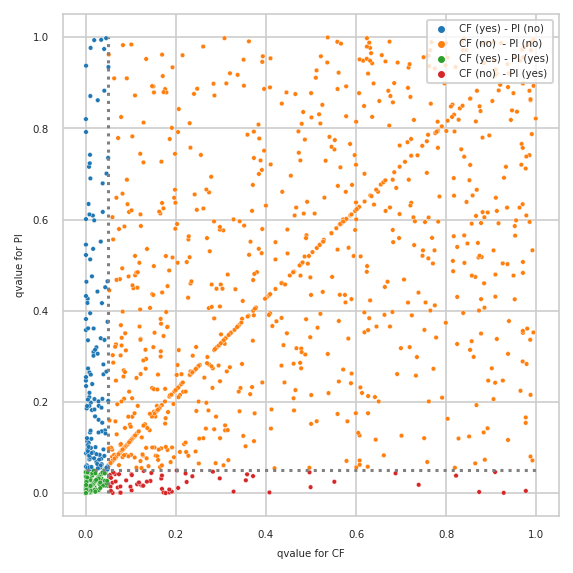

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


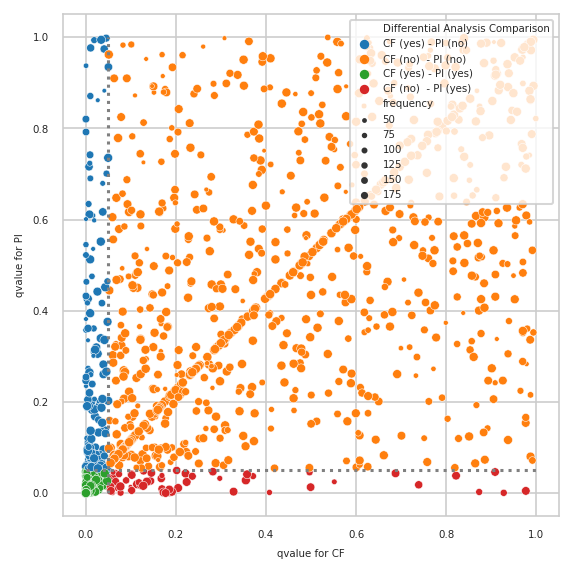

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out